In [1]:
import pandas as pd
import numpy as np
import os
from datetime import datetime

In [2]:
os.chdir(r'C:/Users/gbsegura/Documents/AMPD-Projects/archive/nba-shots-streamlit-app') 
data = pd.read_csv('./data/shot_logs.csv', sep = ',')

In [3]:
data.head()

,GAME_ID,MATCHUP,LOCATION,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,...,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSEST_DEFENDER,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,player_name,player_id
0,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,1,1,1:09,10.8,2,...,7.7,2,made,"Anderson, Alan",101187,1.3,1,2,brian roberts,203148
1,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,2,1,0:14,3.4,0,...,28.2,3,missed,"Bogdanovic, Bojan",202711,6.1,0,0,brian roberts,203148
2,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,3,1,0:00,NaN,3,...,10.1,2,missed,"Bogdanovic, Bojan",202711,0.9,0,0,brian roberts,203148
3,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,4,2,11:47,10.3,2,...,17.2,2,missed,"Brown, Markel",203900,3.4,0,0,brian roberts,203148
4,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,5,2,10:34,10.9,2,...,3.7,2,missed,"Young, Thaddeus",201152,1.1,0,0,brian roberts,203148


In [4]:
data.describe()

,GAME_ID,FINAL_MARGIN,SHOT_NUMBER,PERIOD,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,PTS_TYPE,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,player_id
count,1.280690e+05,128069.000000,128069.000000,128069.000000,122502.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000
mean,2.140045e+07,0.208723,6.506899,2.469427,12.453344,2.023355,2.765901,13.571504,2.264670,159038.487284,4.123015,0.452139,0.997314,157238.251247
std,2.578773e+02,13.233267,4.713260,1.139919,5.763265,3.477760,3.043682,8.888964,0.441159,78791.172947,2.756446,0.497706,1.130978,79362.389336
min,2.140000e+07,-53.000000,1.000000,1.000000,0.000000,0.000000,-163.600000,0.000000,2.000000,708.000000,0.000000,0.000000,0.000000,708.000000
25%,2.140023e+07,-8.000000,3.000000,1.000000,8.200000,0.000000,0.900000,4.700000,2.000000,101249.000000,2.300000,0.000000,0.000000,101162.000000
50%,2.140045e+07,1.000000,5.000000,2.000000,12.300000,1.000000,1.600000,13.700000,2.000000,201949.000000,3.700000,0.000000,0.000000,201939.000000
75%,2.140067e+07,9.000000,9.000000,3.000000,16.675000,2.000000,3.700000,22.500000,3.000000,203079.000000,5.300000,1.000000,2.000000,202704.000000
max,2.140091e+07,53.000000,38.000000,7.000000,24.000000,32.000000,24.900000,47.200000,3.000000,530027.000000,53.200000,1.000000,3.000000,204060.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128069 entries, 0 to 128068
Data columns (total 21 columns):
GAME_ID                       128069 non-null int64
MATCHUP                       128069 non-null object
LOCATION                      128069 non-null object
W                             128069 non-null object
FINAL_MARGIN                  128069 non-null int64
SHOT_NUMBER                   128069 non-null int64
PERIOD                        128069 non-null int64
GAME_CLOCK                    128069 non-null object
SHOT_CLOCK                    122502 non-null float64
DRIBBLES                      128069 non-null int64
TOUCH_TIME                    128069 non-null float64
SHOT_DIST                     128069 non-null float64
PTS_TYPE                      128069 non-null int64
SHOT_RESULT                   128069 non-null object
CLOSEST_DEFENDER              128069 non-null object
CLOSEST_DEFENDER_PLAYER_ID    128069 non-null int64
CLOSE_DEF_DIST                128069 non-null

In [6]:
data.isna().sum()

GAME_ID                          0
MATCHUP                          0
LOCATION                         0
W                                0
FINAL_MARGIN                     0
SHOT_NUMBER                      0
PERIOD                           0
GAME_CLOCK                       0
SHOT_CLOCK                    5567
DRIBBLES                         0
TOUCH_TIME                       0
SHOT_DIST                        0
PTS_TYPE                         0
SHOT_RESULT                      0
CLOSEST_DEFENDER                 0
CLOSEST_DEFENDER_PLAYER_ID       0
CLOSE_DEF_DIST                   0
FGM                              0
PTS                              0
player_name                      0
player_id                        0
dtype: int64

In [7]:
data['GAME_CLOCK'].head()

0     1:09
1     0:14
2     0:00
3    11:47
4    10:34
Name: GAME_CLOCK, dtype: object

In [8]:
data['GAME_CLOCK'] = data['GAME_CLOCK'].apply(lambda x: (datetime.strptime(x, '%M:%S').minute*60)+datetime.strptime(x, '%M:%S').second)

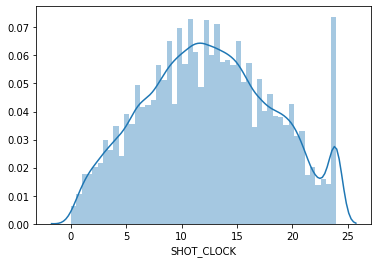

In [9]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

figure(num=None, figsize=(12, 10))
%matplotlib inline
plot = sns.distplot(data['SHOT_CLOCK'][pd.notnull(data['SHOT_CLOCK'])])
plt.show(plot)

In [10]:
data['SHOT_CLOCK'][pd.isna(data['SHOT_CLOCK'])] = data['GAME_CLOCK'][pd.isna(data['SHOT_CLOCK'])]
data['SHOT_CLOCK'][data['SHOT_CLOCK']>24] = 0

C:\Users\gbsegura\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\gbsegura\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


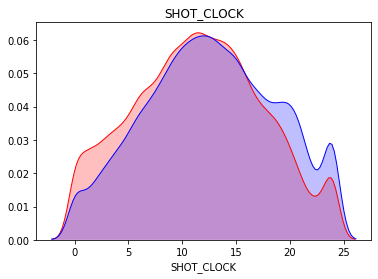

In [11]:
figure(num=None, figsize=(12, 10))
%matplotlib inline
plot = sns.distplot(data['SHOT_CLOCK'][data['FGM']==0],  hist = False, kde = True,
                     kde_kws = {'shade': True, 'linewidth': 1}, color='red')
plot = sns.distplot(data['SHOT_CLOCK'][data['FGM']==1], hist = False, kde = True,
                     kde_kws = {'shade': True, 'linewidth': 1}, color='blue')

plt.title('SHOT_CLOCK')
plt.show(plot)

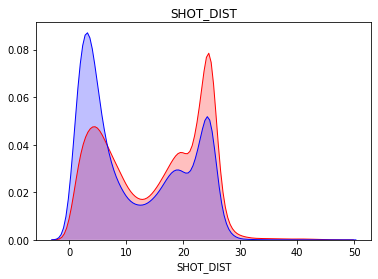

In [12]:
figure(num=None, figsize=(12, 10))
%matplotlib inline
plot = sns.distplot(data['SHOT_DIST'][data['FGM']==0],  hist = False, kde = True,
                     kde_kws = {'shade': True, 'linewidth': 1}, color='red')
plot = sns.distplot(data['SHOT_DIST'][data['FGM']==1], hist = False, kde = True,
                     kde_kws = {'shade': True, 'linewidth': 1}, color='blue')
plt.title('SHOT_DIST')
plt.show(plot)

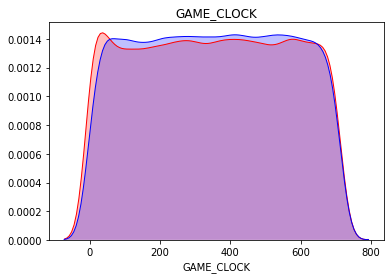

In [13]:
figure(num=None, figsize=(12, 10))
%matplotlib inline
plot = sns.distplot(data['GAME_CLOCK'][data['FGM']==0],  hist = False, kde = True,
                     kde_kws = {'shade': True, 'linewidth': 1}, color='red')
plot = sns.distplot(data['GAME_CLOCK'][data['FGM']==1], hist = False, kde = True,
                     kde_kws = {'shade': True, 'linewidth': 1}, color='blue')
plt.title('GAME_CLOCK')
plt.show(plot)

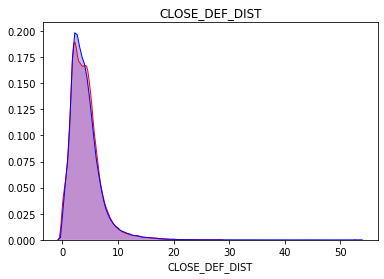

In [14]:
figure(num=None, figsize=(12, 10))
%matplotlib inline
plot = sns.distplot(data['CLOSE_DEF_DIST'][data['FGM']==0],  hist = False, kde = True,
                     kde_kws = {'shade': True, 'linewidth': 1}, color='red')
plot = sns.distplot(data['CLOSE_DEF_DIST'][data['FGM']==1], hist = False, kde = True,
                     kde_kws = {'shade': True, 'linewidth': 1}, color='blue')
plt.title('CLOSE_DEF_DIST')
plt.show(plot)

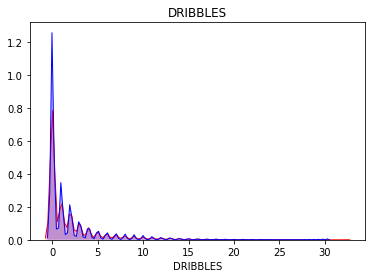

In [15]:
figure(num=None, figsize=(12, 10))
%matplotlib inline
plot = sns.distplot(data['DRIBBLES'][data['FGM']==0],  hist = False, kde = True,
                     kde_kws = {'shade': True, 'linewidth': 1}, color='red')
plot = sns.distplot(data['DRIBBLES'][data['FGM']==1], hist = False, kde = True,
                     kde_kws = {'shade': True, 'linewidth': 1}, color='blue')
plt.title('DRIBBLES')
plt.show(plot)

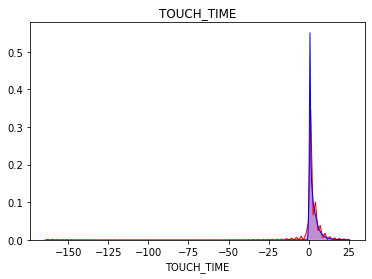

In [16]:
figure(num=None, figsize=(12, 10))
%matplotlib inline
plot = sns.distplot(data['TOUCH_TIME'][data['FGM']==0],  hist = False, kde = True,
                     kde_kws = {'shade': True, 'linewidth': 1}, color='red')
plot = sns.distplot(data['TOUCH_TIME'][data['FGM']==1], hist = False, kde = True,
                     kde_kws = {'shade': True, 'linewidth': 1}, color='blue')
plt.title('TOUCH_TIME')
plt.show(plot)

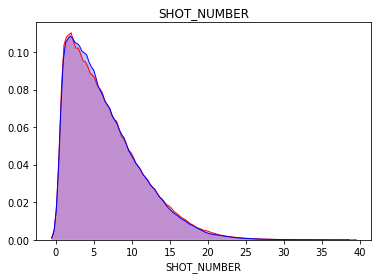

In [17]:
figure(num=None, figsize=(12, 10))
%matplotlib inline
plot = sns.distplot(data['SHOT_NUMBER'][data['FGM']==0],  hist = False, kde = True,
                     kde_kws = {'shade': True, 'linewidth': 1}, color='red')
plot = sns.distplot(data['SHOT_NUMBER'][data['FGM']==1], hist = False, kde = True,
                     kde_kws = {'shade': True, 'linewidth': 1}, color='blue')
plt.title('SHOT_NUMBER')
plt.show(plot)

In [18]:
data.columns

Index(['GAME_ID', 'MATCHUP', 'LOCATION', 'W', 'FINAL_MARGIN', 'SHOT_NUMBER',
       'PERIOD', 'GAME_CLOCK', 'SHOT_CLOCK', 'DRIBBLES', 'TOUCH_TIME',
       'SHOT_DIST', 'PTS_TYPE', 'SHOT_RESULT', 'CLOSEST_DEFENDER',
       'CLOSEST_DEFENDER_PLAYER_ID', 'CLOSE_DEF_DIST', 'FGM', 'PTS',
       'player_name', 'player_id'],
      dtype='object')

In [19]:
defender = data[['CLOSEST_DEFENDER', 'CLOSEST_DEFENDER_PLAYER_ID']]
player = data[['player_name', 'player_id']]

In [20]:
data[data['LOCATION']=='A'].head()

,GAME_ID,MATCHUP,LOCATION,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,...,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSEST_DEFENDER,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,player_name,player_id
0,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,1,1,69,10.8,2,...,7.7,2,made,"Anderson, Alan",101187,1.3,1,2,brian roberts,203148
1,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,2,1,14,3.4,0,...,28.2,3,missed,"Bogdanovic, Bojan",202711,6.1,0,0,brian roberts,203148
2,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,3,1,0,0.0,3,...,10.1,2,missed,"Bogdanovic, Bojan",202711,0.9,0,0,brian roberts,203148
3,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,4,2,707,10.3,2,...,17.2,2,missed,"Brown, Markel",203900,3.4,0,0,brian roberts,203148
4,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,5,2,634,10.9,2,...,3.7,2,missed,"Young, Thaddeus",201152,1.1,0,0,brian roberts,203148


In [21]:
data['TEAM'] = data['MATCHUP'].str[-9:-6]
data['TEAM'][data['LOCATION']=='H'] = data['MATCHUP'][data['LOCATION']=='H'].str[-11:-8]

C:\Users\gbsegura\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [22]:
data['OPPONENT'] = data['MATCHUP'].str[-3:]
data['OPPONENT'][1:5]

1    BKN
2    BKN
3    BKN
4    BKN
Name: OPPONENT, dtype: object

In [23]:
excluded_cols = ['GAME_ID', 
    'W',
    'MATCHUP',
    'SHOT_RESULT',
    'FINAL_MARGIN', 
    'CLOSEST_DEFENDER', 
    'PTS',
    'player_name']
data = data.drop(excluded_cols, axis=1)

In [24]:
data['CLOSEST_DEFENDER_PLAYER_ID'] = data['CLOSEST_DEFENDER_PLAYER_ID'].astype(str)+'d'
data['player_id'] = data['player_id'].astype(str)+'p'

In [25]:
data.head()

,LOCATION,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,PTS_TYPE,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,player_id,TEAM,OPPONENT
0,A,1,1,69,10.8,2,1.9,7.7,2,101187d,1.3,1,203148p,CHA,BKN
1,A,2,1,14,3.4,0,0.8,28.2,3,202711d,6.1,0,203148p,CHA,BKN
2,A,3,1,0,0.0,3,2.7,10.1,2,202711d,0.9,0,203148p,CHA,BKN
3,A,4,2,707,10.3,2,1.9,17.2,2,203900d,3.4,0,203148p,CHA,BKN
4,A,5,2,634,10.9,2,2.7,3.7,2,201152d,1.1,0,203148p,CHA,BKN


In [26]:
data = pd.get_dummies(data, prefix=['TEAM', 'OPPONENT', 'LOCATION', 'CLOSEST_DEFENDER_PLAYER_ID', 'player_id'], columns = ['TEAM', 'OPPONENT', 'LOCATION', 'CLOSEST_DEFENDER_PLAYER_ID', 'player_id'], drop_first=False)
data.head()

,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,PTS_TYPE,CLOSE_DEF_DIST,FGM,...,player_id_2734p,player_id_2736p,player_id_2738p,player_id_2743p,player_id_2744p,player_id_2754p,player_id_2757p,player_id_2772p,player_id_708p,player_id_977p
0,1,1,69,10.8,2,1.9,7.7,2,1.3,1,...,0,0,0,0,0,0,0,0,0,0
1,2,1,14,3.4,0,0.8,28.2,3,6.1,0,...,0,0,0,0,0,0,0,0,0,0
2,3,1,0,0.0,3,2.7,10.1,2,0.9,0,...,0,0,0,0,0,0,0,0,0,0
3,4,2,707,10.3,2,1.9,17.2,2,3.4,0,...,0,0,0,0,0,0,0,0,0,0
4,5,2,634,10.9,2,2.7,3.7,2,1.1,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
defender = defender.drop_duplicates()
player = player.drop_duplicates()

In [28]:
data.to_pickle('./data/clean.pkl')
defender.to_pickle('./data/defender_list.pkl')
player.to_pickle('./data/player_list.pkl')

In [45]:
p = len(data['FGM'][data['FGM']==1])/len(data)
print('missed shots {}'.format(p))
print('made shots {}'.format(1-p))


missed shots 0.4521390812764994
made shots 0.5478609187235006


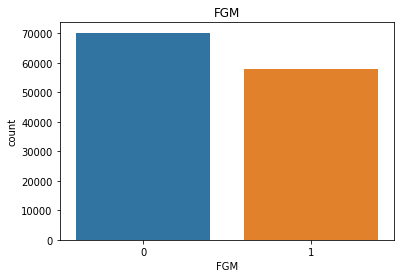

In [41]:
figure(num=None, figsize=(12, 10))
%matplotlib inline
plot = sns.countplot(data['FGM'])
plt.title('FGM')
plt.show(plot)

In [46]:
from sklearn.model_selection import train_test_split

In [49]:
# this function creates thesplits the data into 75/25 train/test proportion
def split_data(data):
    # change the target feature name to labels
    data = data.rename(columns={'FGM': 'labels'})
    dataX = data.drop(['labels'], axis = 1)
    dataY = data['labels']
    
    # Create train and test dataset
    X_train, x_test, Y_train, y_test = train_test_split(dataX, dataY, random_state = 0)
    return X_train, x_test, Y_train, y_test

X_train, x_test, Y_train, y_test = split_data(data)



In [50]:
print('There are {} rows for training.'.format(len(X_train)))
print('There are {} rows for testing.'.format(len(x_test)))

X_train.to_pickle('./data/X_train.pkl')
x_test.to_pickle('./data/x_test.pkl')
Y_train.to_pickle('./data/Y_train.pkl')
y_test.to_pickle('./data/y_test.pkl')

There are 96051 rows for training.
There are 32018 rows for testing.
